In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("MLW_Data.csv") 

df

,CommunityName,BeachName,BeachCountrycode,BeachRegionalSea,BeachLength_m,BeachLocation,BeachType,EventDate,EventType,NatRef,...,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213
0,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20160310,Cleanup,NaN,...,2.0,4.0,NaN,3.0,NaN,NaN,3.0,NaN,1.0,NaN
1,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20150902,Cleanup,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,7.0,3.0,NaN,NaN
2,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20151203,Cleanup,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,2.0,NaN,2.0,1.0
3,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20151008,Cleanup,NaN,...,5.0,NaN,2.0,NaN,NaN,NaN,5.0,26.0,NaN,NaN
4,Legambiente Onlus,San Mauro Cilento (SA),IT,Unknown,100,NaN,NaN,20180428,Monitoring,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,Legambiente Onlus,"Spiaggia di Marina di Montemarciano, Ancona (AN)",IT,Mediterranean Sea,100,NaN,NaN,20160505,Monitoring,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3409,Surfrider Foundation Europe,"La Lagune, 33260 La Teste de Buch, FRANCE",FR,North-east Atlantic Ocean,548,NaN,NaN,20180602,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3410,Surfers Against Sewage,Bournemouth beach,UK,North-east Atlantic Ocean,2302,Urban,Sandy,20150328,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
3411,ocean-R-evolution.com,cleanuptravels.com,CH,NaN,22,Rural,Sandy,20170315,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [4]:
metadf = pd.read_csv("MLW_Meta.csv") 
metadf


,generalcode,category,generalname
0,G1,Plastic,"4/6-pack yokes, six-pack rings"
1,G3,Plastic,Shopping Bags incl. pieces
2,G4,Plastic,"Small plastic bags, e.g. freezer bags incl. pi..."
3,G5,Plastic,Plastic bags collective role; what remains fro...
4,G7,Plastic,Drink bottles <=0.5l
...,...,...,...
159,G210,Glass/ceramics,Other glass items
160,G211,unidentified,"Other medical items (swabs, bandaging, adhesiv..."
161,G213,Chemicals,Paraffin/Wax
162,G301,Cloth/textile,Disposable mask


In [5]:
print(df["BeachType"].value_counts())

Sandy            732
Pebbels          398
Other (mixed)    384
Rocky            174
Name: BeachType, dtype: int64


In [7]:
print(df["EventType"].value_counts())

Cleanup       2623
Monitoring     790
Name: EventType, dtype: int64


array([[<AxesSubplot:title={'center':'EventDate'}>]], dtype=object)

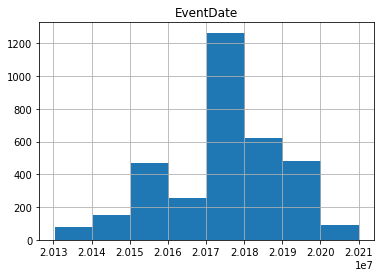

In [10]:
df.hist(column = "EventDate", bins =8)

Finding: dates range from 2013 to 2021, and 2017 is the year with the most cleanups

In [11]:
metadf

,generalcode,category,generalname
0,G1,Plastic,"4/6-pack yokes, six-pack rings"
1,G3,Plastic,Shopping Bags incl. pieces
2,G4,Plastic,"Small plastic bags, e.g. freezer bags incl. pi..."
3,G5,Plastic,Plastic bags collective role; what remains fro...
4,G7,Plastic,Drink bottles <=0.5l
...,...,...,...
159,G210,Glass/ceramics,Other glass items
160,G211,unidentified,"Other medical items (swabs, bandaging, adhesiv..."
161,G213,Chemicals,Paraffin/Wax
162,G301,Cloth/textile,Disposable mask


Disposable mask and disposable glove are G301 and G302, respectively

In [14]:
metadf["category"].value_counts()

Plastic                  89
Metal                    21
Cloth/textile            11
Processed/worked wood    11
Rubber                   10
Paper/Cardboard          10
Glass/ceramics           10
Chemicals                 1
unidentified              1
Name: category, dtype: int64

In [16]:
plasticmetadf = metadf[metadf["category"] == "Plastic"]

plasticmetadf

,generalcode,category,generalname
0,G1,Plastic,"4/6-pack yokes, six-pack rings"
1,G3,Plastic,Shopping Bags incl. pieces
2,G4,Plastic,"Small plastic bags, e.g. freezer bags incl. pi..."
3,G5,Plastic,Plastic bags collective role; what remains fro...
4,G7,Plastic,Drink bottles <=0.5l
...,...,...,...
84,G99,Plastic,Syringes/needles
85,G100,Plastic,Medical/Pharmaceuticals containers/tubes
86,G101,Plastic,Dog feces bag
87,G102,Plastic,Flip-flops


In [18]:
plasticcodes = plasticmetadf["generalcode"]
plasticcodes

0       G1
1       G3
2       G4
3       G5
4       G7
      ... 
84     G99
85    G100
86    G101
87    G102
88    G124
Name: generalcode, Length: 89, dtype: object

In [35]:
dates = df['EventDate']
beachtypes = df["BeachType"]
plastics = df[plasticcodes]

plastics['EventDate'] = dates
plastics["BeachType"] = beachtypes

totalPlast = plastics[plasticcodes].sum(axis=1);
plastics["Total Plastic"] = totalPlast

plastics['EventDate'] = pd.to_datetime(df['EventDate'], format='%Y%m%d')


plastics
#totalsmoke = df[listOfSmokingColumns].sum(axis=1);
#smokingdf['total smoking items'] = totalsmoke;



<ipython-input-35-8eb8d783fade>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastics['EventDate'] = dates
<ipython-input-35-8eb8d783fade>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastics["BeachType"] = beachtypes
<ipython-input-35-8eb8d783fade>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,G1,G3,G4,G5,G7,G8,G9,G10,G11,G12,...,G97,G98,G99,G100,G101,G102,G124,EventDate,BeachType,Total Plastic
0,NaN,NaN,1.0,NaN,8.0,31.0,2.0,4.0,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2016-03-10,Sandy,214.0
1,NaN,12.0,1.0,NaN,10.0,9.0,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,21.0,2015-09-02,Sandy,954.0
2,NaN,27.0,7.0,NaN,3.0,8.0,1.0,9.0,NaN,1.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2015-12-03,Sandy,210.0
3,NaN,15.0,60.0,NaN,18.0,46.0,NaN,9.0,10.0,5.0,...,NaN,1.0,2.0,NaN,NaN,5.0,10.0,2015-10-08,Sandy,1022.0
4,NaN,5.0,6.0,NaN,13.0,19.0,13.0,6.0,4.0,2.0,...,NaN,NaN,NaN,2.0,NaN,1.0,NaN,2018-04-28,NaN,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,NaN,1.0,23.0,NaN,16.0,NaN,NaN,1.0,NaN,1.0,...,1.0,NaN,NaN,8.0,NaN,NaN,14.0,2016-05-05,NaN,392.0
3409,NaN,0.0,1.0,NaN,0.0,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,1.0,NaN,2018-06-02,NaN,83.0
3410,NaN,5.0,NaN,NaN,11.0,1.0,NaN,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,252.0,2015-03-28,Sandy,1230.0
3411,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-15,Sandy,8.0


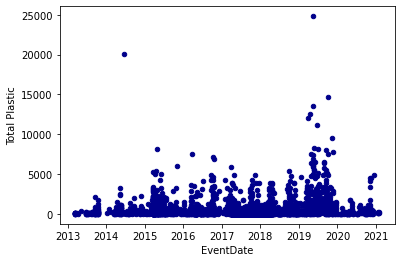

In [36]:
plastx = plastics['Total Plastic']
plasty = plastics["EventDate"]

ax1 = plastics.plot.scatter(y='Total Plastic',
                      x='EventDate',
                      c='DarkBlue')